# Plotting training loss for resolution combinations

This notebook plots the training losses from the loss dictionaries that `cross_attn_exp_script.py` writes to disk.

In [1]:
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# Reading from disk
with open("../data/60ep_single_res_losses.json", "r") as read_file:
    losses = json.load(read_file)

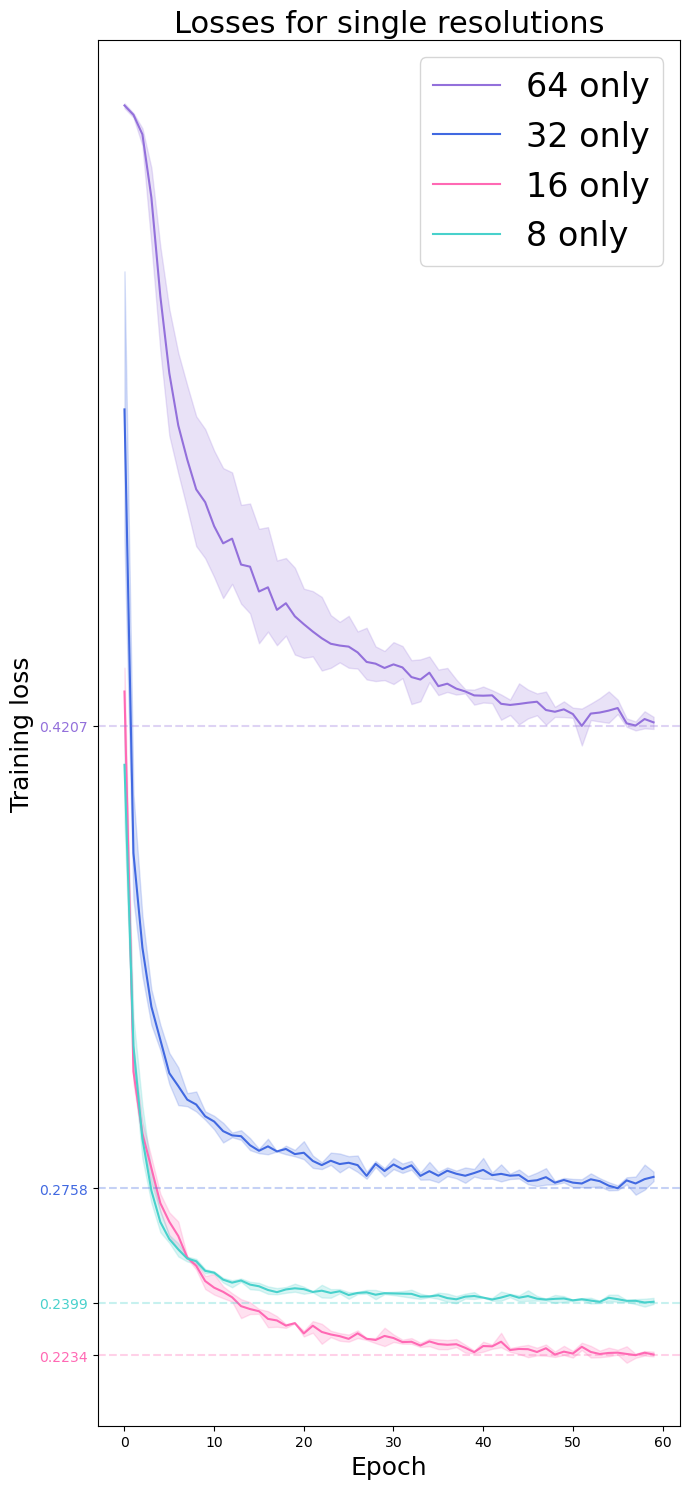

In [3]:
plt.figure(figsize=(7, 15))

# Get the losses for each resolution
loss_8  = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in losses["1,0,0,0"]], dim=0)
loss_16 = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in losses["0,1,0,0"]], dim=0)
loss_32 = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in losses["0,0,1,0"]], dim=0)
loss_64 = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in losses["0,0,0,1"]], dim=0)

assert loss_8.shape == loss_16.shape == loss_32.shape == loss_64.shape
n_epochs = len(loss_8.mean(dim=0))

# Get the minimum value of the losses
min_8  = loss_8.mean(dim=0).min().item()
min_16 = loss_16.mean(dim=0).min().item()
min_32 = loss_32.mean(dim=0).min().item()
min_64 = loss_64.mean(dim=0).min().item()

plt.plot(loss_64.mean(dim=0), label="64 only", color="mediumpurple")
plt.fill_between(range(n_epochs), loss_64.min(dim=0).values, loss_64.max(dim=0).values, alpha=0.2, color="mediumpurple")

plt.plot(loss_32.mean(dim=0), label="32 only", color="royalblue")
plt.fill_between(range(n_epochs), loss_32.min(dim=0).values, loss_32.max(dim=0).values, alpha=0.2, color="royalblue")

plt.plot(loss_16.mean(dim=0), label="16 only", color="hotpink")
plt.fill_between(range(n_epochs), loss_16.min(dim=0).values, loss_16.max(dim=0).values, alpha=0.2, color="hotpink")

plt.plot(loss_8.mean(dim=0), label="8 only", color="mediumturquoise")
plt.fill_between(range(len(loss_8.mean(dim=0))), loss_8.min(dim=0).values, loss_8.max(dim=0).values, alpha=0.2, color="mediumturquoise")

plt.yticks([min_8, min_16, min_32, min_64])

# Set the y-tick labels to match the color of the corresponding horizontal line
tick_colors = ['mediumturquoise', 'hotpink', 'royalblue', 'mediumpurple']
for tick_label, color in zip(plt.gca().get_yticklabels(), tick_colors):
    tick_label.set_color(color)

# Draw a horizontal line at min_value
plt.axhline(y=min_8,  color='mediumturquoise', linestyle='--', alpha=0.3)
plt.axhline(y=min_16, color='hotpink',         linestyle='--', alpha=0.3)
plt.axhline(y=min_32, color='royalblue',       linestyle='--', alpha=0.3)
plt.axhline(y=min_64, color='mediumpurple',    linestyle='--', alpha=0.3)

plt.title("Losses for single resolutions", fontsize=22)
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Training loss", fontsize=18)
plt.legend(fontsize=24);
plt.tight_layout()
plt.savefig("../plots/60ep_single_res_losses.pdf", bbox_inches='tight')

In [4]:
# Reading from disk
with open("../data/60ep_two_res_losses.json", "r") as read_file:
    two_res_losses = json.load(read_file)

two_res_losses.keys()

dict_keys(['1,1,0,0', '1,0,1,0', '1,0,0,1', '0,1,1,0', '0,1,0,1', '0,0,1,1'])

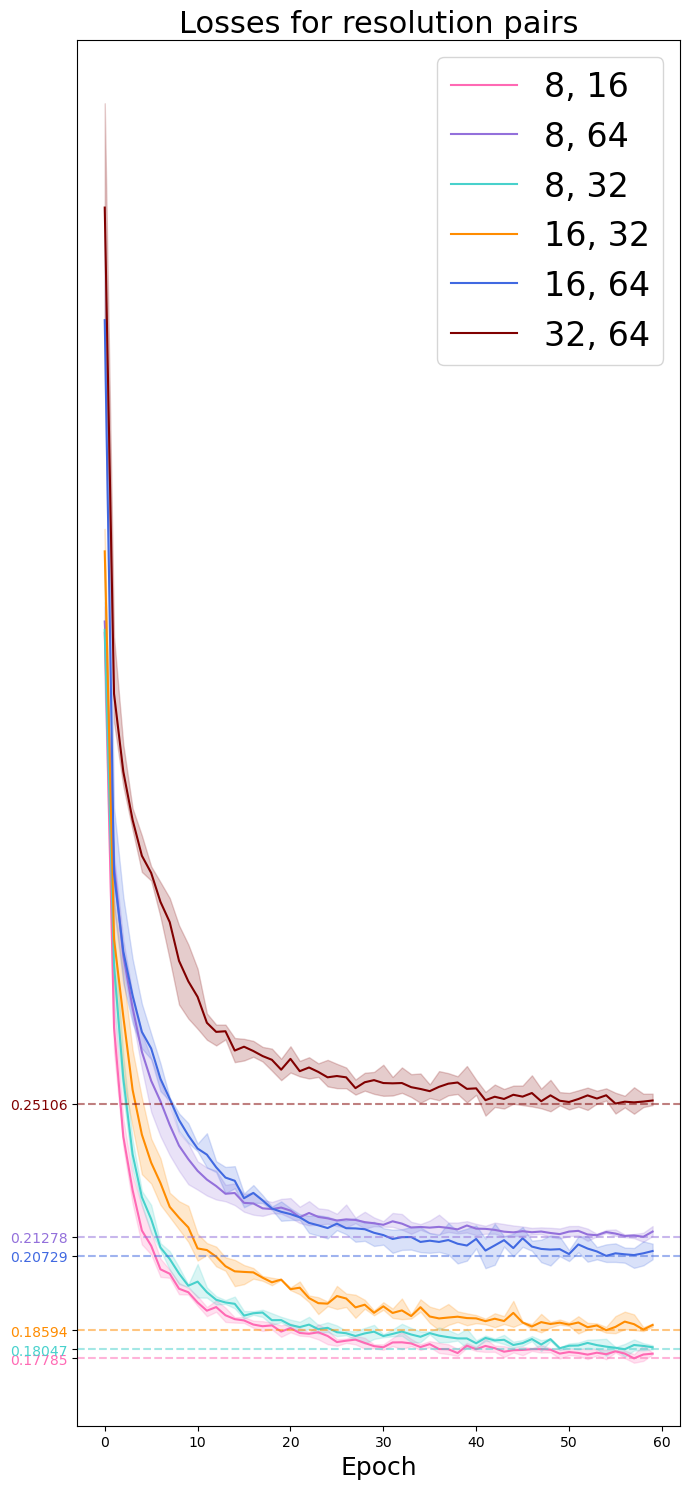

In [5]:
plt.figure(figsize=(7, 15))

loss_8_16  = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in two_res_losses["1,1,0,0"]], dim=0)
loss_8_32  = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in two_res_losses["1,0,1,0"]], dim=0)
loss_8_64  = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in two_res_losses["1,0,0,1"]], dim=0)
loss_16_32 = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in two_res_losses["0,1,1,0"]], dim=0)
loss_16_64 = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in two_res_losses["0,1,0,1"]], dim=0)
loss_32_64 = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in two_res_losses["0,0,1,1"]], dim=0)

assert loss_8_16.shape == loss_8_32.shape == loss_8_64.shape == loss_16_32.shape == loss_16_64.shape == loss_32_64.shape
n_epochs = len(loss_8_16.mean(dim=0))

min_8_16  = loss_8_16.mean(dim=0).min().item()
min_8_32  = loss_8_32.mean(dim=0).min().item()
min_8_64  = loss_8_64.mean(dim=0).min().item()
min_16_32 = loss_16_32.mean(dim=0).min().item()
min_16_64 = loss_16_64.mean(dim=0).min().item()
min_32_64 = loss_32_64.mean(dim=0).min().item()

plt.plot(loss_8_16.mean(dim=0), label="8, 16", color="hotpink")
plt.fill_between(range(n_epochs), loss_8_16.min(dim=0).values, loss_8_16.max(dim=0).values, alpha=0.2, color="hotpink")

plt.plot(loss_8_64.mean(dim=0), label="8, 64", color="mediumpurple")
plt.fill_between(range(n_epochs), loss_8_64.min(dim=0).values, loss_8_64.max(dim=0).values, alpha=0.2, color="mediumpurple")

plt.plot(loss_8_32.mean(dim=0), label="8, 32", color="mediumturquoise")
plt.fill_between(range(n_epochs), loss_8_32.min(dim=0).values, loss_8_32.max(dim=0).values, alpha=0.2, color="mediumturquoise")

plt.plot(loss_16_32.mean(dim=0), label="16, 32", color="darkorange")
plt.fill_between(range(n_epochs), loss_16_32.min(dim=0).values, loss_16_32.max(dim=0).values, alpha=0.2, color="darkorange")

plt.plot(loss_16_64.mean(dim=0), label="16, 64", color="royalblue")
plt.fill_between(range(n_epochs), loss_16_64.min(dim=0).values, loss_16_64.max(dim=0).values, alpha=0.2, color="royalblue")

plt.plot(loss_32_64.mean(dim=0), label="32, 64", color="maroon")
plt.fill_between(range(n_epochs), loss_32_64.min(dim=0).values, loss_32_64.max(dim=0).values, alpha=0.2, color="maroon")

plt.yticks([min_8_16, min_8_32, min_8_64, min_16_32, min_16_64, min_32_64])

# Set the y-tick labels to match the color of the corresponding horizontal line
tick_colors = ['hotpink', 'mediumturquoise', 'mediumpurple', 'darkorange', 'royalblue', 'maroon']
for tick_label, color in zip(plt.gca().get_yticklabels(), tick_colors):
    tick_label.set_color(color)

# Draw a horizontal line at min_value
plt.axhline(y=min_8_16,  color='hotpink',         linestyle='--', alpha=0.5)
plt.axhline(y=min_8_32,  color='mediumturquoise', linestyle='--', alpha=0.5)
plt.axhline(y=min_8_64,  color='mediumpurple',    linestyle='--', alpha=0.5)
plt.axhline(y=min_16_32, color='darkorange',      linestyle='--', alpha=0.5)
plt.axhline(y=min_16_64, color='royalblue',       linestyle='--', alpha=0.5)
plt.axhline(y=min_32_64, color='maroon',          linestyle='--', alpha=0.5)

plt.title("Losses for resolution pairs", fontsize=22)
plt.xlabel("Epoch", fontsize=18)
plt.legend(fontsize=24);
plt.tight_layout()
plt.savefig("../plots/60ep_two_res_losses.pdf", bbox_inches='tight')

In [6]:
# Reading from disk
with open("../data/60ep_three_four_res_losses.json", "r") as read_file:
    three_four_res_losses = json.load(read_file)

three_four_res_losses.keys()

dict_keys(['1,1,1,0', '1,1,0,1', '1,0,1,1', '0,1,1,1', '1,1,1,1'])

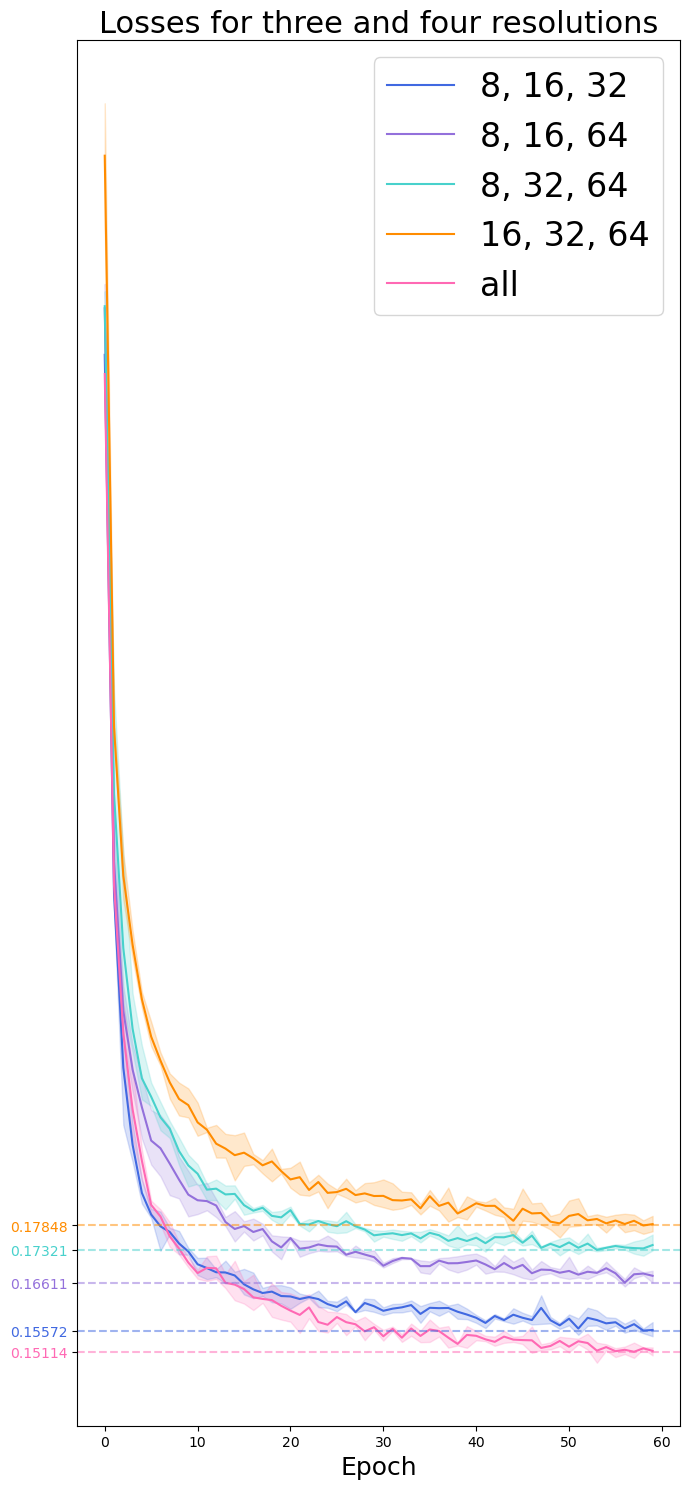

In [7]:
plt.figure(figsize=(7, 15))

loss_8_16_32  = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in three_four_res_losses["1,1,1,0"]], dim=0)
loss_8_16_64  = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in three_four_res_losses["1,1,0,1"]], dim=0)
loss_8_32_64  = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in three_four_res_losses["1,0,1,1"]], dim=0)
loss_16_32_64 = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in three_four_res_losses["0,1,1,1"]], dim=0)
loss_all      = torch.cat([torch.tensor(loss).unsqueeze(0) for loss in three_four_res_losses["1,1,1,1"]], dim=0)

assert loss_8_16_32.shape == loss_8_16_64.shape == loss_8_32_64.shape == loss_16_32_64.shape == loss_all.shape
n_epochs = len(loss_8_16_32.mean(dim=0))

min_8_16_32  = loss_8_16_32.mean(dim=0).min().item()
min_8_16_64  = loss_8_16_64.mean(dim=0).min().item()
min_8_32_64  = loss_8_32_64.mean(dim=0).min().item()
min_16_32_64 = loss_16_32_64.mean(dim=0).min().item()
min_all      = loss_all.mean(dim=0).min().item()

plt.plot(loss_8_16_32.mean(dim=0), label="8, 16, 32", color="royalblue")
plt.fill_between(range(n_epochs), loss_8_16_32.min(dim=0).values, loss_8_16_32.max(dim=0).values, alpha=0.2, color="royalblue")

plt.plot(loss_8_16_64.mean(dim=0), label="8, 16, 64", color="mediumpurple")
plt.fill_between(range(n_epochs), loss_8_16_64.min(dim=0).values, loss_8_16_64.max(dim=0).values, alpha=0.2, color="mediumpurple")

plt.plot(loss_8_32_64.mean(dim=0), label="8, 32, 64", color="mediumturquoise")
plt.fill_between(range(n_epochs), loss_8_32_64.min(dim=0).values, loss_8_32_64.max(dim=0).values, alpha=0.2, color="mediumturquoise")

plt.plot(loss_16_32_64.mean(dim=0), label="16, 32, 64", color="darkorange")
plt.fill_between(range(n_epochs), loss_16_32_64.min(dim=0).values, loss_16_32_64.max(dim=0).values, alpha=0.2, color="darkorange")

plt.plot(loss_all.mean(dim=0), label="all", color="hotpink")
plt.fill_between(range(n_epochs), loss_all.min(dim=0).values, loss_all.max(dim=0).values, alpha=0.2, color="hotpink")

plt.yticks([min_8_16_32, min_8_16_64, min_8_32_64, min_16_32_64, min_all])

# Set the y-tick labels to match the color of the corresponding horizontal line
tick_colors = ['royalblue', 'mediumpurple', 'mediumturquoise', 'darkorange', 'hotpink']
for tick_label, color in zip(plt.gca().get_yticklabels(), tick_colors):
    tick_label.set_color(color)

# Draw a horizontal line at min_value
plt.axhline(y=min_8_16_32,  color='royalblue',       linestyle='--', alpha=0.5)
plt.axhline(y=min_8_16_64,  color='mediumpurple',    linestyle='--', alpha=0.5)
plt.axhline(y=min_8_32_64,  color='mediumturquoise', linestyle='--', alpha=0.5)
plt.axhline(y=min_16_32_64, color='darkorange',      linestyle='--', alpha=0.5)
plt.axhline(y=min_all,      color='hotpink',         linestyle='--', alpha=0.5)

plt.title("Losses for three and four resolutions", fontsize=22)
plt.xlabel("Epoch", fontsize=18)
plt.legend(fontsize=24);
plt.tight_layout()
plt.savefig("../plots/60ep_three_four_res_losses.pdf", bbox_inches='tight')